In [1]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
processed_data = pd.read_csv("../data/03_Processed/01_ProcessedData.csv")

In [4]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 38 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID                                                           60 non-null     int64  
 1   Uczestnictwo                                                 60 non-null     object 
 2   Programming: R                                               59 non-null     float64
 3   Programming: Python                                          59 non-null     float64
 4   Programming: Bash                                            59 non-null     float64
 5   Version Control: GIT                                         59 non-null     float64
 6   Containers: Docker                                           59 non-null     float64
 7   CLI: (np. Bash, PowerShell, CMD)                             59 non-null     float

In [5]:
processed_data.describe()

,ID,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,Databases: NoSQL,...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
count,60.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,32.400000,1.847458,2.593220,1.305085,1.983051,1.372881,1.457627,1.508475,2.847458,1.915254,...,1.400000,1.733333,1.483333,1.050000,1.633333,1.216667,1.333333,1.233333,1.416667,1.083333
std,18.876225,1.047387,0.697746,1.192711,1.252467,1.230339,1.222237,1.072748,0.738441,0.836415,...,0.960226,1.147830,1.016669,0.909926,0.956098,0.922261,0.985775,0.908839,0.869281,0.869281
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.750000,1.000000,2.000000,0.000000,1.500000,0.000000,0.000000,1.000000,2.000000,2.000000,...,1.000000,1.000000,0.750000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.750000
50%,31.500000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,48.250000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,2.000000,2.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,67.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000


In [6]:
processed_data.columns

Index(['ID', 'Uczestnictwo', 'Programming: R', 'Programming: Python',
       'Programming: Bash', 'Version Control: GIT', 'Containers: Docker',
       'CLI: (np. Bash, PowerShell, CMD)',
       'Front End: (HTML, JavaScript, CSS)', 'Databases: SQL',
       'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC',
       'BI: PowerBI', 'BI: Tableau', 'Area: Time Series',
       'Area: Classical ML (Clustering, Regression, Classification)',
       'Area: NLP', 'Area: Computer Vision', 'Project Management',
       'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne',
       'Nawiązywanie Relacji z Biznesem', 'Nawiązywanie Relacji z naukowcami',
       'Pozyskiwanie finansowania', 'Współpraca z administracją UEW',
       'FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech',
       'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR',
       'Jeżeli pominięto branżę, na której się znasz dopisz ją:'],
      dtype='object')

In [7]:
df_corr = processed_data[['Programming: R', 'Programming: Python',
       'Programming: Bash', 'Version Control: GIT', 'Containers: Docker',
       'CLI: (np. Bash, PowerShell, CMD)',
       'Front End: (HTML, JavaScript, CSS)', 'Databases: SQL',
       'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC',
       'BI: PowerBI', 'BI: Tableau', 'Area: Time Series',
       'Area: Classical ML (Clustering, Regression, Classification)',
       'Area: NLP', 'Area: Computer Vision', 'Project Management',
       'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne',
       'Nawiązywanie Relacji z Biznesem', 'Nawiązywanie Relacji z naukowcami',
       'Pozyskiwanie finansowania', 'Współpraca z administracją UEW',
       'FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech',
       'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR']]
df_corr.corr()

,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)","Front End: (HTML, JavaScript, CSS)",Databases: SQL,Databases: NoSQL,Cloud: Azure,...,Współpraca z administracją UEW,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
Programming: R,1.000000,0.220327,0.189714,0.050568,0.272352,0.176684,0.008843,0.214608,0.181797,0.156106,...,0.130412,0.250150,0.100166,0.044083,0.164840,0.141343,0.232866,-0.085993,0.125851,0.183315
Programming: Python,0.220327,1.000000,0.648917,0.583849,0.661750,0.606171,0.258063,0.245581,0.501227,0.245980,...,0.147254,0.174405,0.269898,-0.020993,-0.024353,0.113968,0.127763,-0.024610,0.126436,0.085514
Programming: Bash,0.189714,0.648917,1.000000,0.730649,0.896332,0.907887,0.483056,0.288661,0.562131,0.406276,...,0.294159,0.355708,0.355989,0.111597,0.115753,0.093816,0.260488,0.086924,0.339323,0.139739
Version Control: GIT,0.050568,0.583849,0.730649,1.000000,0.753817,0.714717,0.481324,0.071724,0.360687,0.320496,...,0.076968,0.284963,0.266378,0.075764,0.037551,0.092100,0.143292,0.064928,0.200348,0.032736
Containers: Docker,0.272352,0.661750,0.896332,0.753817,1.000000,0.882064,0.507029,0.310389,0.550619,0.438063,...,0.334040,0.358929,0.347464,0.120349,0.133916,0.137953,0.289825,0.068466,0.253893,0.178001
"CLI: (np. Bash, PowerShell, CMD)",0.176684,0.606171,0.907887,0.714717,0.882064,1.000000,0.555857,0.269708,0.628876,0.413599,...,0.248235,0.342106,0.443926,0.163352,0.132817,0.152497,0.310282,0.095957,0.339270,0.188454
"Front End: (HTML, JavaScript, CSS)",0.008843,0.258063,0.483056,0.481324,0.507029,0.555857,1.000000,-0.009222,0.490810,0.535056,...,0.229304,0.163379,0.308024,0.323550,0.320188,0.248754,0.353246,0.273927,0.326710,0.320053
Databases: SQL,0.214608,0.245581,0.288661,0.071724,0.310389,0.269708,-0.009222,1.000000,0.313686,0.221417,...,0.088394,0.028675,0.025975,-0.039241,0.039858,-0.000426,-0.092832,-0.070199,-0.040907,-0.059585
Databases: NoSQL,0.181797,0.501227,0.562131,0.360687,0.550619,0.628876,0.490810,0.313686,1.000000,0.503092,...,0.171254,0.262004,0.415905,0.207866,0.109920,0.246139,0.221956,0.120466,0.337763,0.174556
Cloud: Azure,0.156106,0.245980,0.406276,0.320496,0.438063,0.413599,0.535056,0.221417,0.503092,1.000000,...,0.127699,0.079967,0.117522,0.315789,0.263907,0.279426,0.236691,0.175033,0.226581,0.130161


<Axes: >

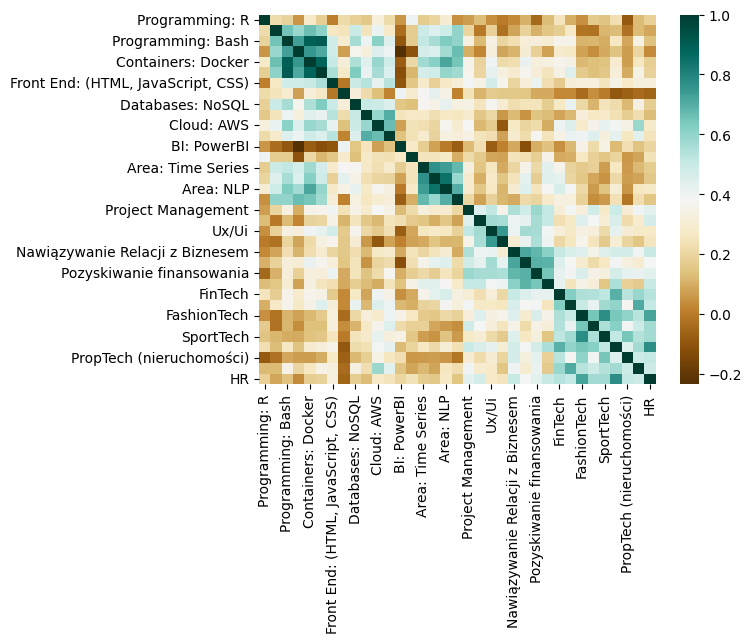

In [8]:
sns.heatmap(df_corr.corr(),cmap='BrBG')

<Figure size 640x480 with 0 Axes>

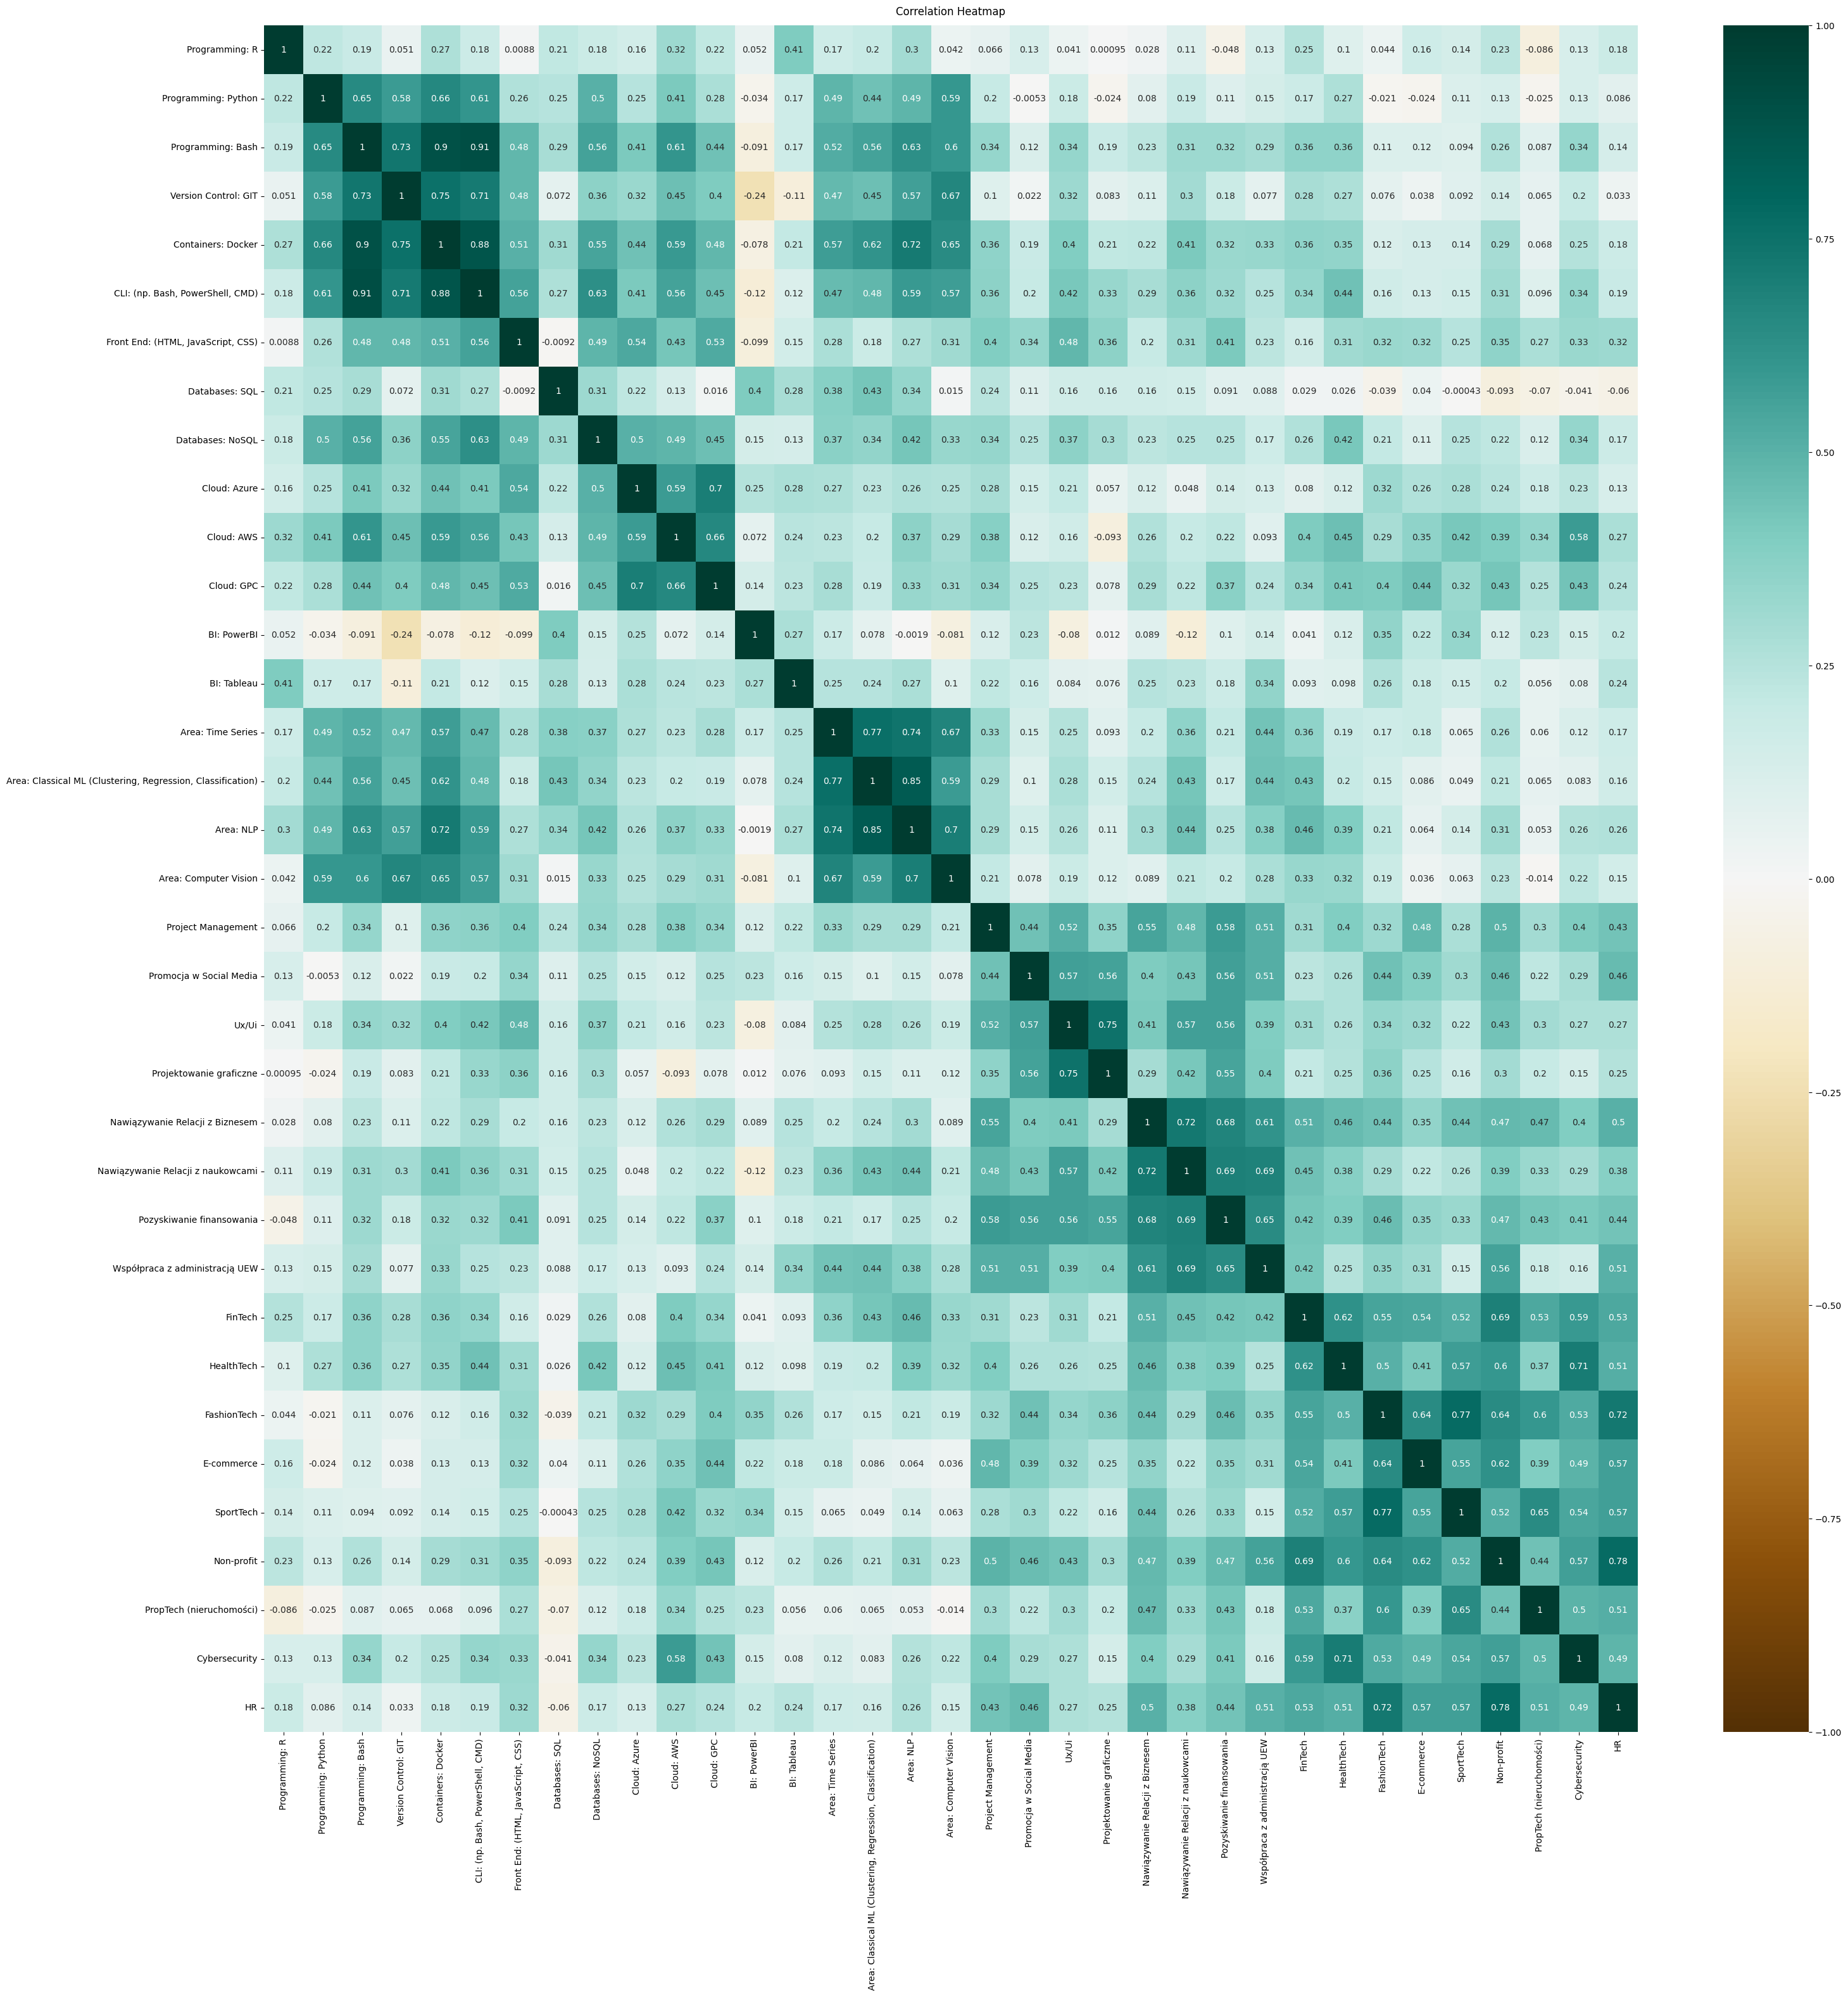

In [9]:
plt.figure()
plt.figure(figsize=(35,35))
heatmap = sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.savefig('../figures/heatmap.png', dpi=300)

In [10]:
participants = processed_data["Uczestnictwo"].value_counts()
print("Liczba uczestników wg typu:\n", participants)

Liczba uczestników wg typu:
 Uczestnictwo
Projekt                35
Projekt+organizacja    24
Organizacja             1
Name: count, dtype: int64


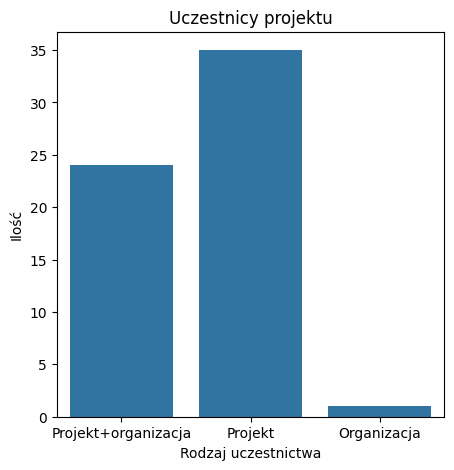

In [11]:
plt.figure(figsize=(5, 5))
sns.countplot(data=processed_data, x="Uczestnictwo")
plt.ylabel('Ilość')
plt.xlabel('Rodzaj uczestnictwa')
plt.title('Uczestnicy projektu')
plt.show()